In [ ]:
import matplotlib.pyplot as plt
import io
import pandas as pd

# Funkcje

In [ ]:
def plot_one(df):
  plt.figure(figsize=(8, 6))

  plt.plot(df['seed'], df['old'], label='Benchmark', marker='o')
  plt.plot(df['seed'], df['optuna'], label='Optuna', marker='o')
  plt.plot(df['seed'], df['cmaes'], label='Cmaes', marker='o')

  plt.xlabel('Seed')
  plt.ylabel('Accuracy')
  name = df['dataset'].iloc[0]
  plt.title(f'Accuracy depending on the seed {name}')

  plt.legend()

  plt.grid(True)
  plt.show()

In [ ]:
def plot_all_optuna():
  for dataset in all_data['dataset'].unique():
      dataset_data = all_data[all_data['dataset'] == dataset]
      plt.plot(dataset_data['seed'], dataset_data['difference_optuna'], label=dataset, marker='o')

  plt.xlabel('Seed')
  plt.ylabel('Accuracy difference betweeen Optuna and benchmark model')
  plt.title('Accuracy difference betweeen Optuna and benchmark model depending on dataset')

  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

  plt.grid(True)
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
def plot_all_cmaes():
  for dataset in all_data['dataset'].unique():
      dataset_data = all_data[all_data['dataset'] == dataset]
      plt.plot(dataset_data['seed'], dataset_data['difference_cmaes'], label=dataset, marker='o')

  plt.xlabel('Seed')
  plt.ylabel('Accuracy difference betweeen CMA-ES and benchmark model')
  plt.title('Accuracy difference betweeen CMA-ES and benchmark model depending on dataset')

  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

  plt.grid(True)
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
def plot_all_cmaesvsoptuna():
  for dataset in all_data['dataset'].unique():
      dataset_data = all_data[all_data['dataset'] == dataset]
      plt.plot(dataset_data['seed'], dataset_data['diff_optuna_cmaes'], label=dataset, marker='o')

  plt.xlabel('Seed')
  plt.ylabel('Accuracy ifference between Optuna and CMA-ES')
  plt.title('Accuracy difference between Optuna and CMA-ES depending on dataset')

  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

  plt.grid(True)
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
def show_importance(df):
  value_counts = df[0].value_counts()

  plt.figure(figsize=(8, 6))
  value_counts.plot(kind='bar', color='skyblue')

  plt.xlabel('Hyperparameter')
  plt.ylabel('Frequency')
  plt.title('Frequency of hyperparameter occurrences')

  plt.xticks(rotation=45)
  plt.show()

# Dane

In [ ]:
mushroom = pd.read_csv(io.StringIO('''
old,optuna,seed,cmaes
99.75,99.88,42,100.00
99.75,99.88,1234,100.00
99.75,99.75,0,100.00
99.88,100.00,1,100.00
99.88,99.75,13,100.00
'''), header=0)
mushroom['seed'] = mushroom['seed'].astype(str)
mushroom['dataset'] = 'Mushroom'


heart_attack = pd.read_csv(io.StringIO('''
old,optuna,seed,cmaes
90.32,87.10,42,90.32
87.10,83.87,1234,90.32
87.10, 90.32,0,90.32
 90.32, 90.32,1,90.32
87.10,90.32,13,90.32
'''), header=0)
heart_attack['seed'] = heart_attack['seed'].astype(str)
heart_attack['dataset'] = 'Heart attack prediction'


mobile_class = pd.read_csv(io.StringIO('''
old,optuna,seed,cmaes
89.00,89.50,42,95.00
86.50,89.50,1234,94.00
86.50,88.50,0,95.50
89.00,92.00,1,94.50
88.00,88.00,13,94.50
'''), header=0)
mobile_class['seed'] = mobile_class['seed'].astype(str)
mobile_class['dataset'] = 'Mobile price classification'


loans = pd.read_csv(io.StringIO('''
old,optuna,seed,cmaes
86.60,92.62,42,92.78
87.40,92.51,1234,92.71
86.29,92.38,0,92.64
86.20,92.40,1,92.76
86.56,92.36,13,92.64
'''), header=0)
loans['seed'] = loans['seed'].astype(str)
loans['dataset'] = 'Loan approval classification'


beaches = pd.read_csv(io.StringIO('''
old,optuna,seed,cmaes
85.38,99.75,42, 99.83
97.96,99.68,1234,99.83
84.39,99.71,0,99.81
96.19,99.69,1,99.77
91.48,99.58,13,99.83
'''), header=0)
beaches['seed'] = beaches['seed'].astype(str)
beaches['dataset'] = 'Beaches vs mountains preference'

In [ ]:
dfs = [mushroom, heart_attack, mobile_class, loans, beaches]

for d in dfs:
  d['difference_optuna'] = d['optuna'] - d['old']
  d['difference_cmaes'] = d['cmaes'] - d['old']
  d['diff_optuna_cmaes'] = d['optuna'] - d['cmaes']
for d in dfs:
  d['mean_optuna'] = d['difference_optuna'].mean()
  d['mean_cmaes']= d['difference_cmaes'].mean()
all_data = pd.concat(dfs)

In [ ]:
imp_optuna = pd.read_csv(io.StringIO('''
learning_rate
learning_rate
lambda_l2
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
bagging_freq
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
learning_rate
feature_fraction
learning_rate
learning_rate
'''), header=None)


# Optuna and Cmaes vs Benchmark

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Apply consistent style for modern and clean visuals
sns.set_theme(style="whitegrid")

def plot_one(df):
    plt.figure(figsize=(10, 6))

    # Use a lineplot with a smoother aesthetic for clarity
    sns.lineplot(data=df, x='seed', y='old', label='Benchmark', marker='o', color='gray', linewidth=2)
    sns.lineplot(data=df, x='seed', y='optuna', label='Optuna', marker='o', color='blue', linewidth=2)
    sns.lineplot(data=df, x='seed', y='cmaes', label='CMA-ES', marker='o', color='green', linewidth=2)

    plt.xlabel('Seed', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    dataset_name = df['dataset'].iloc[0]
    plt.title(f'Accuracy by Seed ({dataset_name})', fontsize=14, fontweight='bold')

    plt.legend(fontsize=10, loc='lower right', frameon=True)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_all_optuna():
    plt.figure(figsize=(12, 6))

    # Use a boxplot to show distribution of accuracy improvements per dataset
    sns.boxplot(data=all_data, x='dataset', y='difference_optuna', palette="Blues")
    sns.stripplot(data=all_data, x='dataset', y='difference_optuna', color='black', size=6, jitter=True)

    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Accuracy Difference (Optuna - Benchmark)', fontsize=12)
    plt.title('Optuna Accuracy Improvement by Dataset', fontsize=14, fontweight='bold')

    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_all_cmaes():
    plt.figure(figsize=(12, 6))

    # Use a boxplot to highlight distribution of improvements across datasets
    sns.boxplot(data=all_data, x='dataset', y='difference_cmaes', palette="Greens")
    sns.stripplot(data=all_data, x='dataset', y='difference_cmaes', color='black', size=6, jitter=True)

    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Accuracy Difference (CMA-ES - Benchmark)', fontsize=12)
    plt.title('CMA-ES Accuracy Improvement by Dataset', fontsize=14, fontweight='bold')

    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_all_cmaesvsoptuna():
    plt.figure(figsize=(12, 6))

    # Use a heatmap to compare Optuna vs CMA-ES performance across datasets and seeds
    heatmap_data = all_data.pivot(index='seed', columns='dataset', values='diff_optuna_cmaes')
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Accuracy Difference (Optuna - CMA-ES)'})

    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Seed', fontsize=12)
    plt.title('Accuracy Difference Between Optuna and CMA-ES by Dataset and Seed', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

def show_importance(df):
    value_counts = df[0].value_counts()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", edgecolor='black')

    plt.xlabel('Hyperparameter', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Frequency of Hyperparameter Occurrences', fontsize=14, fontweight='bold')

    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


## Difference in accuracy for each dataset

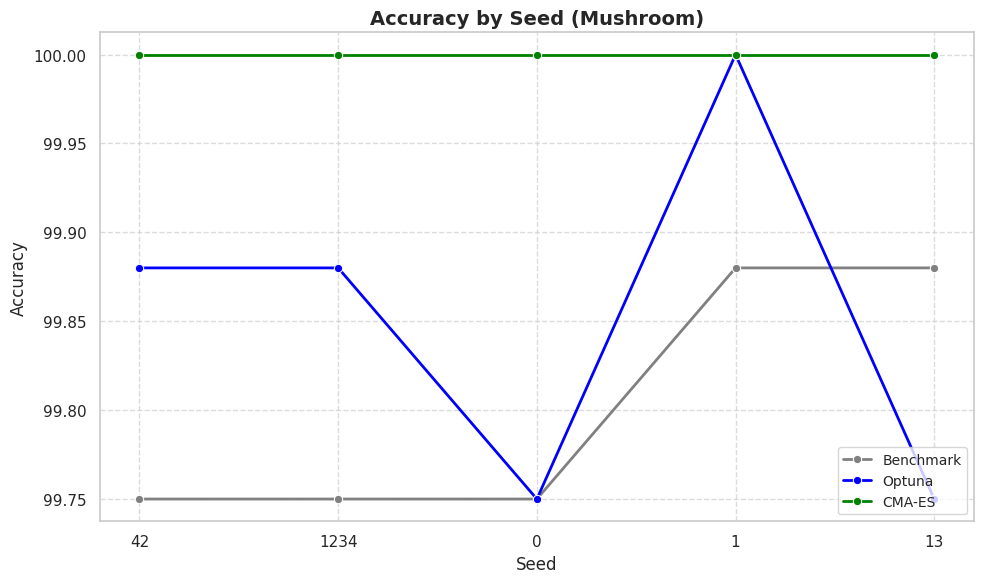

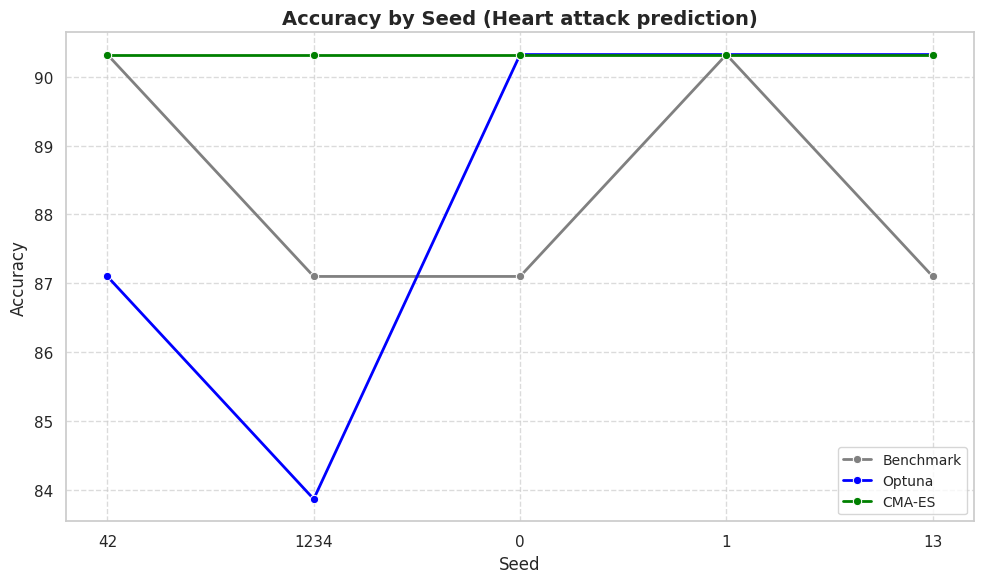

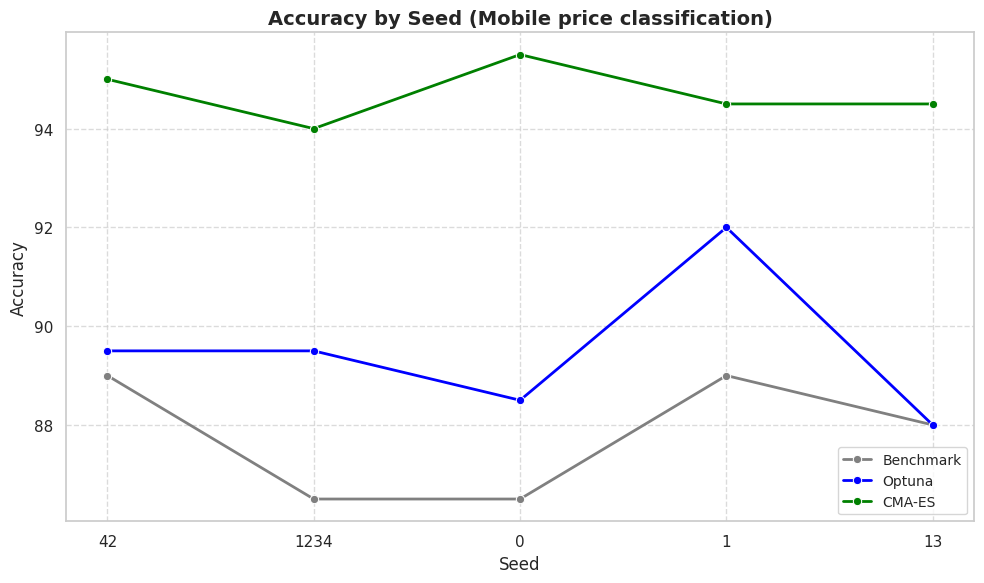

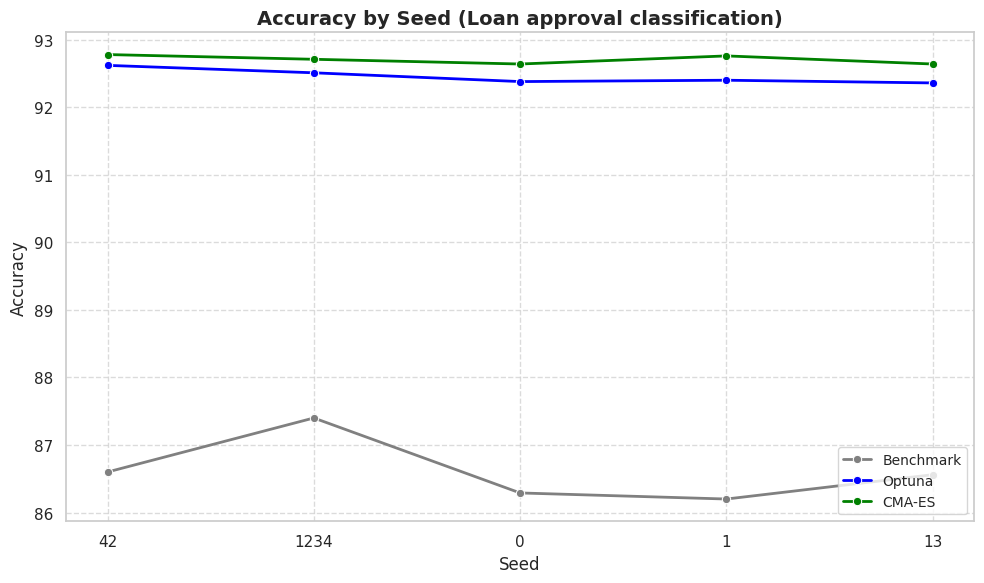

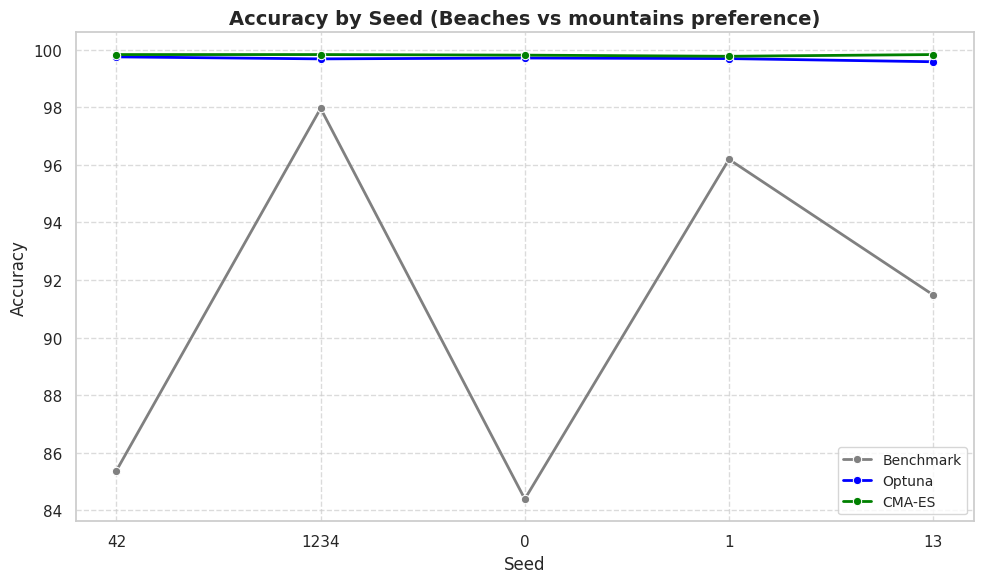

In [ ]:
plot_one(mushroom)
plot_one(heart_attack)
plot_one(mobile_class)
plot_one(loans)
plot_one(beaches)

<ipython-input-20-3b679ec3884a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='dataset', y='difference_optuna', palette="Blues")


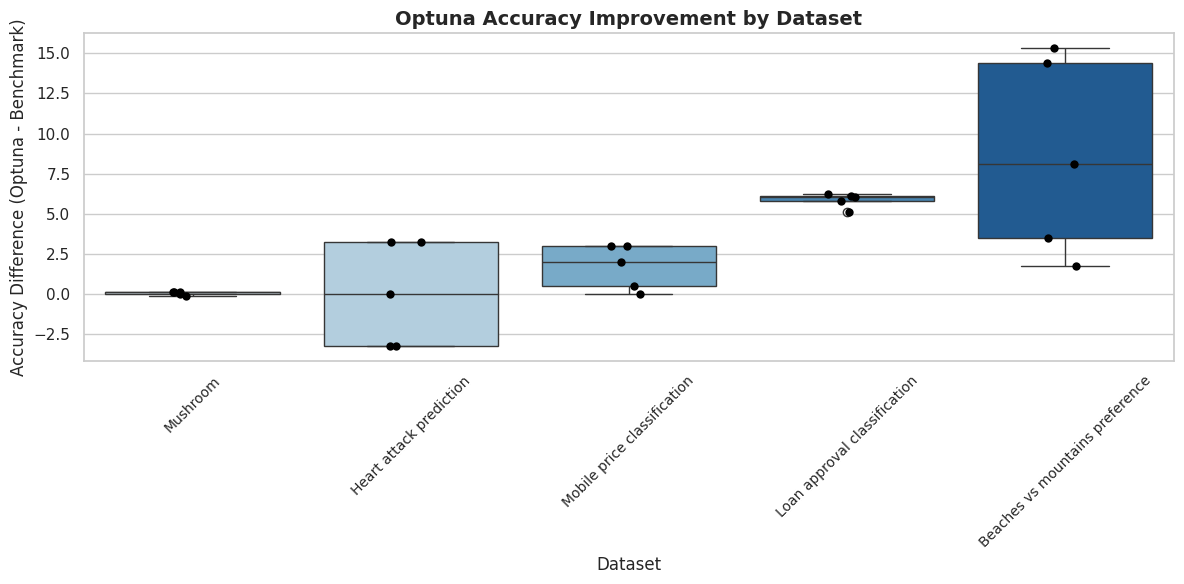

In [ ]:
plot_all_optuna()

<ipython-input-20-3b679ec3884a>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='dataset', y='difference_cmaes', palette="Greens")


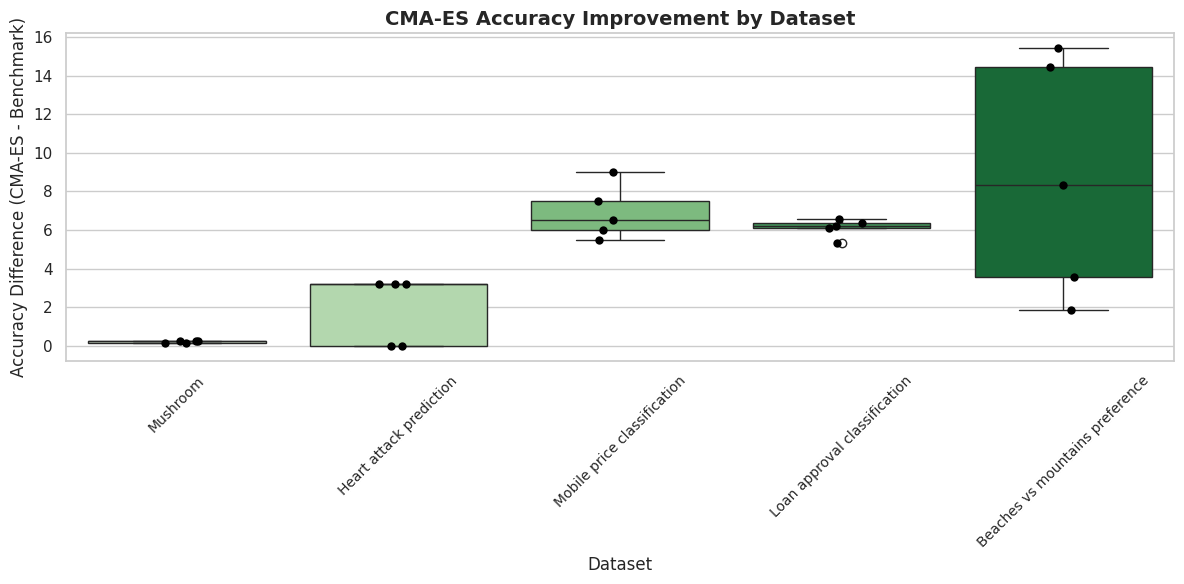

In [ ]:
plot_all_cmaes()

Mean difference in accuracy

In [ ]:
mean_optuna_per_dataset = all_data.groupby('dataset')['mean_optuna'].first()

print(mean_optuna_per_dataset)

dataset
Beaches vs mountains preference    8.602
Heart attack prediction           -0.002
Loan approval classification       5.844
Mobile price classification        1.700
Mushroom                           0.050
Name: mean_optuna, dtype: float64


In [ ]:
mean_cmaes_per_dataset = all_data.groupby('dataset')['mean_cmaes'].first()

print(mean_cmaes_per_dataset)

dataset
Beaches vs mountains preference    8.734
Heart attack prediction            1.932
Loan approval classification       6.096
Mobile price classification        6.900
Mushroom                           0.198
Name: mean_cmaes, dtype: float64


## Most important hyperparameter

<ipython-input-20-3b679ec3884a>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", edgecolor='black')


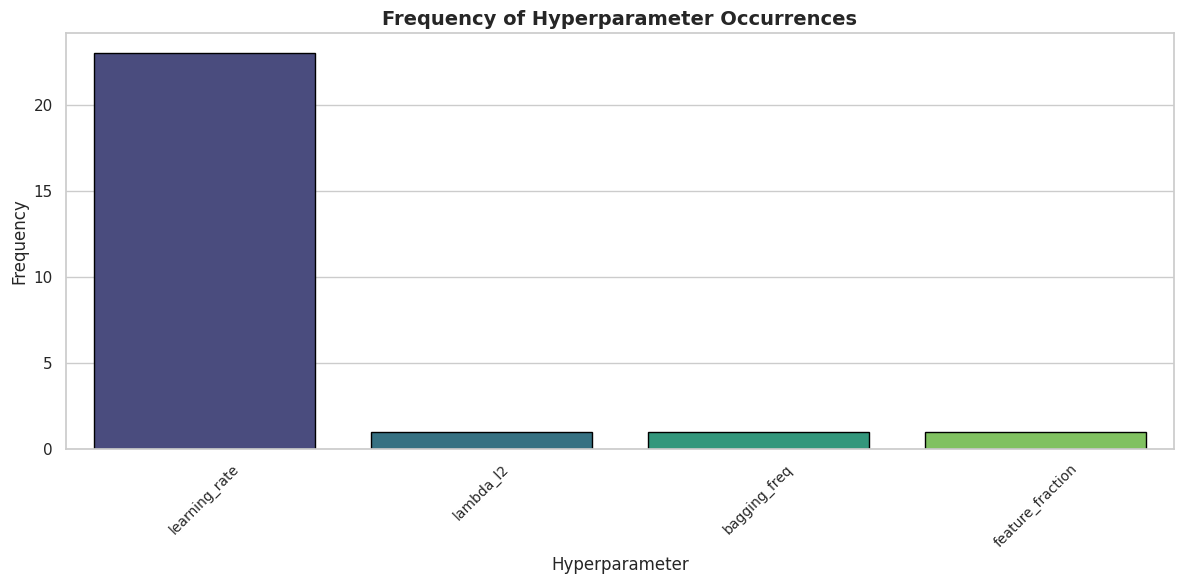

In [ ]:
show_importance(imp_optuna)

# Cmaes vs Optuna

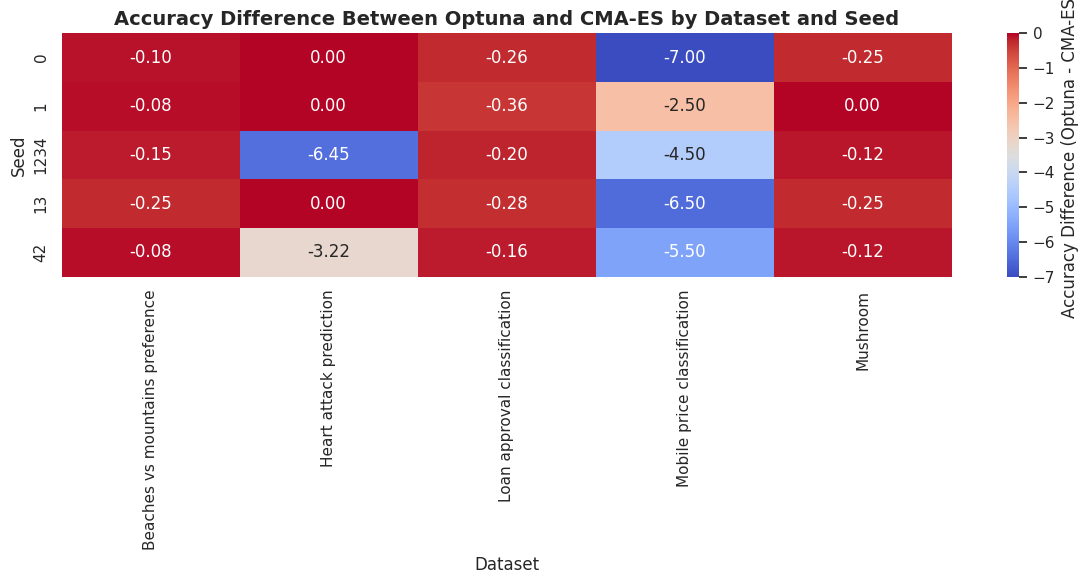

In [ ]:
plot_all_cmaesvsoptuna()

#Sets of the best hyperparameters per dataset

##Mushrooms

Optuna

Accuracy: 1.0
Number of trials: 80
Best hyperparameters: {'learning_rate': 0.2722040791345323, 'num_leaves': 137, 'feature_fraction': 0.8276489428276066, 'bagging_fraction': 0.7400408127447112, 'bagging_freq': 4, 'lambda_l1': 5.556204777342298e-07, 'lambda_l2': 0.02368550465614277}

-------------------------------------------------------------

Optuna Hyperparameter Importance

learning_rate: 0.7795
bagging_fraction: 0.0750
lambda_l2: 0.0584
num_leaves: 0.0397
bagging_freq: 0.0254
feature_fraction: 0.0216
lambda_l1: 0.0004

Most important hyperparameter: learning_rate (importance: 0.7795)
Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%

-------------------------------------------------------------

CMA-ES

Accuracy 0.998769987699877<br>
Number of iterations:  42<br>
Best hyperparameters: [2.74698552e-01 3.22149739e+01 2.00825283e+01 8.78376999e-01
 8.64015077e-01 4.26812194e+00 9.06817980e-04 5.81282806e-01]



##Mobile device usage and user behavior

Optuna

Accuracy: 1.0
Number of trials: 0
Best hyperparameters: {'learning_rate': 0.0646642271741456, 'num_leaves': 113, 'feature_fraction': 0.7411053504286575, 'bagging_fraction': 0.7179532731987588, 'bagging_freq': 5, 'lambda_l1': 0.006502000785097662, 'lambda_l2': 8.675307976899775e-05}

-------------------------------------------------------------

Optuna Hyperparameter Importance

bagging_freq: 0.5061
feature_fraction: 0.2347
bagging_fraction: 0.0810
num_leaves: 0.0776
lambda_l1: 0.0530
learning_rate: 0.0449
lambda_l2: 0.0027

Most important hyperparameter: bagging_freq (importance: 0.5061)
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1: 100.00%

-------------------------------------------------------------

CMA-ES

Accuracy 1.0<br>
Number of iterations:  2<br>
Best hyperparameters: [3.89723023e-02 3.09027456e+01 2.00387906e+01 5.91084993e-01
 8.38702336e-01 4.35006823e+00 2.28800158e-03 4.41378199e-01]



##Mobile price classification
Optuna

Accuracy: 0.945
Number of trials: 26
Best hyperparameters: {'learning_rate': 0.29738495565630085, 'num_leaves': 139, 'feature_fraction': 0.8418575387021847, 'bagging_fraction': 0.5244061744730909, 'bagging_freq': 4, 'lambda_l1': 5.67238348165875e-05, 'lambda_l2': 0.142339254630193}

-------------------------------------------------------------

Optuna Hyperparameter Importance

learning_rate: 0.4552
feature_fraction: 0.3368
lambda_l2: 0.0662
bagging_freq: 0.0485
lambda_l1: 0.0438
num_leaves: 0.0369
bagging_fraction: 0.0126

Most important hyperparameter: learning_rate (importance: 0.4552)
Accuracy: 88.50%
Precision: 89.15%
Recall: 88.50%
F1: 88.50%

-------------------------------------------------------------

CMA-ES

Accuracy 0.945<br>
Number of iterations:  100<br>
Best hyperparameters: [2.62027164e-01 3.13591349e+01 2.00603477e+01 8.97688163e-01
 8.45447439e-01 5.24612824e+00 8.38143918e-03 2.97287345e-01]



##Loan approval classification

Optuna

Accuracy: 0.9295555555555556
Number of trials: 53
Best hyperparameters: {'learning_rate': 0.2547481989061905, 'num_leaves': 89, 'feature_fraction': 0.6612279055812048, 'bagging_fraction': 0.8775189303289495, 'bagging_freq': 1, 'lambda_l1': 0.005619655073655928, 'lambda_l2': 5.548353428337781e-05}

-------------------------------------------------------------

Optuna Hyperparameter Importance

learning_rate: 0.9981
num_leaves: 0.0008
feature_fraction: 0.0007
bagging_fraction: 0.0003
lambda_l1: 0.0001
bagging_freq: 0.0001
lambda_l2: 0.0000

Most important hyperparameter: learning_rate (importance: 0.9981)
Accuracy: 92.38%
Precision: 92.24%
Recall: 92.38%
F1: 92.12%

-------------------------------------------------------------

CMA-ES

Accuracy 0.9262222222222222<br>
Number of iterations:  100<br>
Best hyperparameters: [ 0.27728688 32.71213732 20.10447172  0.62276239  0.50928206  5.1435178
  0.21355267  0.63736861]




##Beaches vs mountains preference

Optuna

Accuracy: 0.9977121067683508
Number of trials: 81
Best hyperparameters: {'learning_rate': 0.29741247922395664, 'num_leaves': 138, 'feature_fraction': 0.8281359057381713, 'bagging_fraction': 0.7753779179097308, 'bagging_freq': 5, 'lambda_l1': 8.980961118741278e-07, 'lambda_l2': 0.27939463082563404}

-------------------------------------------------------------

Optuna Hyperparameter Importance

learning_rate: 0.9767
num_leaves: 0.0128
feature_fraction: 0.0070
bagging_fraction: 0.0020
lambda_l2: 0.0007
bagging_freq: 0.0007
lambda_l1: 0.0000

Most important hyperparameter: learning_rate (importance: 0.9767)
Accuracy: 99.71%
Precision: 99.72%
Recall: 99.71%
F1: 99.71%

-------------------------------------------------------------
CMA-ES

Accuracy 0.9986653956148713<br>
Number of iterations:  100<br>
Best hyperparameters: [ 0.28726789 30.9216452  20.41108534  0.89904127  0.513657    4.96488158
  0.42132115  0.33330096]
